<a href="https://colab.research.google.com/github/Leyzeld/mach_learn/blob/main/ml_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1) Постановка задачи**

---------------------------------
Задача регрессии. Я буду использовать датасет с Kaggle, который содержит информацию об аниме, такую как жанр, тип, количество эпизодов, название, рейтинг и колличество людей поставивших оценку. Моя цель - предсказать, рейтинг аниме на основе жанров.

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from statistics import mean

# **2) Чтение данных**

In [126]:
df = pd.read_csv('https://raw.githubusercontent.com/Leyzeld/mach_learn/main/anime.csv')
df.shape

(12294, 7)

> **Сохранение столбца с названиями для последующего использования**



In [62]:
anime_names = df['name'].copy()

# **3) Визуализация данных и вычисление основные характеристики**

           anime_id        rating       members
count  12294.000000  12064.000000  1.229400e+04
mean   14058.221653      6.473902  1.807134e+04
std    11455.294701      1.026746  5.482068e+04
min        1.000000      1.670000  5.000000e+00
25%     3484.250000      5.880000  2.250000e+02
50%    10260.500000      6.570000  1.550000e+03
75%    24794.500000      7.180000  9.437000e+03
max    34527.000000     10.000000  1.013917e+06


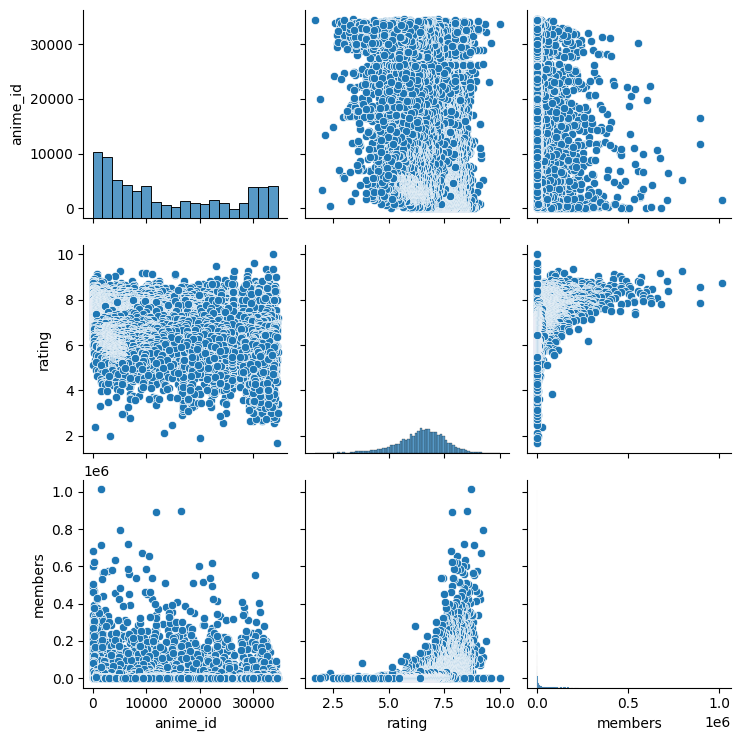

In [127]:
print(df.describe())
sns.pairplot(df)

In [128]:
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


# **4) Фильтрация данных**

---

Следует исключить еще не вышедшие до конца произведения и пустые значния, для корректности результатов. Ведь ожидания на произведение могут быть завышены, а конечные результат неудовлетворительны.


In [129]:
df = df.loc[df['episodes'] != 'Unknown']
df = df.dropna()
df.shape

(11830, 7)

# **5) Обработка категориальных признаков**
---
У каждого произведения есть несколько жанров и они разделены запятыми, для этого я создал отдельный столбец под каждый жанр, чтобы было проще разделять их и преобразить в числовые признаки.

In [130]:
df['genre'] = df['genre'].str.split(', ')
df = df.explode('genre')
df = pd.get_dummies(df, columns=['genre'])

> В данном блоке кода были убраны столбцы с названием и типом аниме(фильм, сериал и т.п)



In [131]:
df = df.drop('name', axis=1)
df = df.drop('type', axis=1)

# **6) Нормализация**
---
Произвожу нормализацию для того чтобы классификатор ближайших соседей работал лучше. Потому что k-ближайших соседей лучше выполняют свою задачю если признаки имеют примерно одинаковый масштаб

In [ ]:
scaler = StandardScaler()
df.loc[:, df.columns != 'rating'] = scaler.fit_transform(df.loc[:, df.columns != 'rating'])

# **7) Разбиение данных на обучающуюся и тестовую выборки**
---
В данном случае "X y train" это обучающиеся выборки

А "X y test" - тестовые

In [133]:
X = df.drop('rating', axis=1)
y = df['rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **8) Запуск и поиск оптимального колличества значений ближайших соседей**
---
мной был выбран метод ближайших соседей потому что он прост в реализации и понимании. Он многофункционален и подходит как для задачи классификации, так и для задачи регрессии

In [134]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

Text(0, 0.5, 'Mean Error')

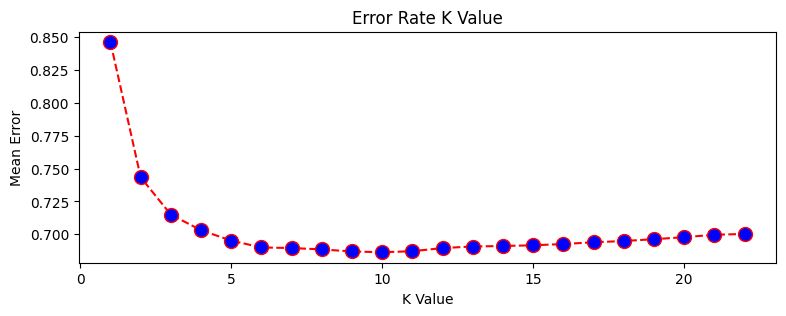

In [123]:
errors = []
for i in range(1, 23):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    errors.append(np.sqrt(mean_squared_error(y_test, pred_i)))

plt.figure(figsize=(9, 3))
plt.plot(range(1, 23), errors, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

# **9) Вычисление ошибки на обучающейся и тестовой выборках**

In [136]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)
print("Train: ", np.sqrt(mean_squared_error(y_train, y_pred_train)))
print("Test: ", np.sqrt(mean_squared_error(y_test, y_pred_test)))

Train:  0.6325802422543918
Test:  0.6863812826419429


In [143]:
def get_predicted_rating(anime_name):
    anime_features = X[anime_names == anime_name]
    predicted_rating = knn.predict(anime_features)
    return predicted_rating

anime_name = 'Steins;Gate'
print(f'Predicted rating for {anime_name}: {mean(get_predicted_rating(anime_name))}')

Predicted rating for Steins;Gate: 8.4875


# **10) Вывод**
---
Как можно видеть результат удовлетворительный и почти совпал с исходной оценкой которая составляет "9.17". Но это не говорит о том, что можно оценивать произведение по конкретным жанрам, так как я не учитваю описание аниме(синопсис) и востребованность на определенныен жанры в разные временные промежутки. Например в середине 90-х был популярен жанр "меха", который сейчас не востребован.